# Trying some fast gp

In [306]:
import os 
import sys
import pandas as pd 
import numpy as np
import glob

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [319]:
#os.listdir('task_store/')
fns_all = glob.glob('task_store/full*')


print(fns_all)
print(len(fns_all))


['task_store/full_experiment_job_4068887_task_7_cleveland.csv', 'task_store/full_experiment_job_4068887_task_3_cleveland.csv', 'task_store/full_experiment_job_4068887_task_4_wisconsin.csv', 'task_store/full_experiment_job_4068887_task_11_cleveland.csv', 'task_store/full_experiment_job_4068887_task_10_mammo_graphic.csv', 'task_store/full_experiment_job_4068887_task_1_ionosphere.csv', 'task_store/full_experiment_job_4068887_task_2_mammo_graphic.csv', 'task_store/full_experiment_job_4068887_task_9_ionosphere.csv', 'task_store/full_experiment_job_4068887_task_6_mammo_graphic.csv', 'task_store/full_experiment_job_4068887_task_5_ionosphere.csv', 'task_store/full_experiment_job_4068887_task_8_wisconsin.csv']
11


In [308]:
"""
What does task id relate to?
"""
task_id = {
    '1': 'ORMOGP ave ionosphere',
    '2' :'ORMOGP ave mammo_graphic',
    '3' :'ORMOGP ave cleveland',
    '4': 'ORMOGP ave wisconsin',
    '5':'ORMOGP acc ionosphere',
    '6' :'ORMOGP acc mammo_graphic',
    '7' :'ORMOGP acc cleveland',
    '8' :'ORMOGP acc wisconsin',
    '9' :'MOGP ionosphere',
    '10':'MOGP mammo_graphic',
    '11': 'MOGP cleveland',
    '12': 'MOGP wisconsin',
    '13': 'GP ionosphere',
    '14': 'GP mammo_graphic',
    '15': 'GP cleveland',
    '16': 'GP wisconsin',
}

In [317]:
# we have these tasks loaded in : and now we map the filenames basck to what that task is
name_task = {}
for k in task_id.keys():
    for fn in fns_all:
        if f'task_{k}' in fn:
            name_task[fn] = task_id[k]
name_task

{'task_store/full_experiment_job_4068887_task_11_cleveland.csv': 'MOGP cleveland',
 'task_store/full_experiment_job_4068887_task_10_mammo_graphic.csv': 'MOGP mammo_graphic',
 'task_store/full_experiment_job_4068887_task_1_ionosphere.csv': 'ORMOGP ave ionosphere',
 'task_store/full_experiment_job_4068887_task_2_mammo_graphic.csv': 'ORMOGP ave mammo_graphic',
 'task_store/full_experiment_job_4068887_task_3_cleveland.csv': 'ORMOGP ave cleveland',
 'task_store/full_experiment_job_4068887_task_4_wisconsin.csv': 'ORMOGP ave wisconsin',
 'task_store/full_experiment_job_4068887_task_5_ionosphere.csv': 'ORMOGP acc ionosphere',
 'task_store/full_experiment_job_4068887_task_6_mammo_graphic.csv': 'ORMOGP acc mammo_graphic',
 'task_store/full_experiment_job_4068887_task_7_cleveland.csv': 'ORMOGP acc cleveland',
 'task_store/full_experiment_job_4068887_task_8_wisconsin.csv': 'ORMOGP acc wisconsin',
 'task_store/full_experiment_job_4068887_task_9_ionosphere.csv': 'MOGP ionosphere'}

In [310]:
results = {}
for fn in fns_all:
    results[fn] = pd.read_csv(f'{fn}', index_col=False)
#results['task_store/mogp_experiment_job_4067500_task_1_ionosphere.csv']

In [311]:
# method to efficently grab correct subsections from 
def get_data(fn, member_generation, training, final):
    x = results[fn]
    x = x[x['member_generation'] == member_generation]
    x = x[x['training'] == training][final].to_numpy()
    return x
    

In [312]:
# Training and test overall files 
for fn in fns_all:
    d = get_data(fn=fn, member_generation=False, training=True, final='full_acc')
    training_acc = d.sum() / d.shape[0]

    d = get_data(fn=fn, member_generation=False, training=False, final='full_acc')
    test_acc = d.sum() / d.shape[0]
    
    print(f'{fn}')
    print(f'Training acc = {training_acc}')
    print(f'Test acc = {test_acc} \n')

task_store/full_experiment_job_4068887_task_7_cleveland.csv
Training acc = 0.8117552334943638
Test acc = 0.7848148148148149 

task_store/full_experiment_job_4068887_task_3_cleveland.csv
Training acc = 0.8082125603864737
Test acc = 0.7911111111111111 

task_store/full_experiment_job_4068887_task_4_wisconsin.csv
Training acc = 0.9682705718270571
Test acc = 0.9572357723577237 

task_store/full_experiment_job_4068887_task_11_cleveland.csv
Training acc = 0.8135265700483092
Test acc = 0.7855555555555556 

task_store/full_experiment_job_4068887_task_10_mammo_graphic.csv
Training acc = 0.8095811818703387
Test acc = 0.7926372155287819 

task_store/full_experiment_job_4068887_task_1_ionosphere.csv
Training acc = 0.8650340136054422
Test acc = 0.839622641509434 

task_store/full_experiment_job_4068887_task_2_mammo_graphic.csv
Training acc = 0.8030981067125644
Test acc = 0.7815261044176707 

task_store/full_experiment_job_4068887_task_9_ionosphere.csv
Training acc = 0.8740136054421768
Test acc = 0.

# First looking at TPR vs TNR for each dataset

In [314]:
def full_extent(ax, pad=0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

def dataset_index(fn):
    if 'cleveland' in fn:
        return 0
    if 'wisconsin' in fn:
        return 1
    if 'mammo_graphic' in fn:
        return 2
    if 'ionosphere' in fn:
        return 3
datasets = ['cleveland', 'wisconsin', 'mammo_graphic', 'ionosphere']

### Training

\begin{tabular}{rrr}
\toprule
   0 &    1 &    2 \\
\midrule
0.71 & 0.71 & 0.71 \\
0.96 & 0.97 &   -1 \\
0.83 & 0.83 & 0.85 \\
0.98 & 0.98 & 0.99 \\
\bottomrule
\end{tabular}



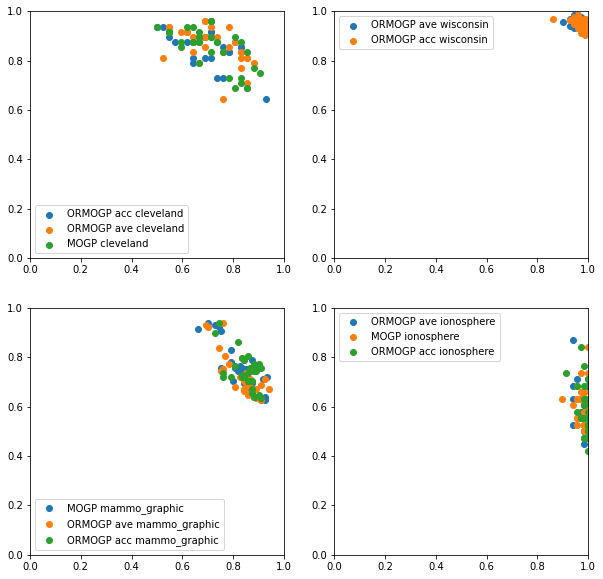

In [315]:
from matplotlib.transforms import Bbox

fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]

latex_table = [[],[],[],[]]

for j,fn in enumerate(fns_all):
    i = dataset_index(fn)
    
    ax = axs[ind[i][0], ind[i][1]]
    name = name_task[fn]
    dmaj = get_data(fn=fn, member_generation=False, training=False, final='majority_acc')
    dmin = get_data(fn=fn, member_generation=False, training=False, final='minority_acc')
    line = ax.scatter(dmaj, dmin, label=name)
    latex_table[i].append(np.mean(dmaj))
    ax.legend()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

graph_name = "tprtnr_selection_test"
for i in range(4):
    ax = axs[ind[i][0], ind[i][1]]
    extent = full_extent(ax).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'data/graphs/{graph_name}_{datasets[i]}.png', bbox_inches=extent)
    
# and pritning latex table 
df = pd.DataFrame(latex_table)
df[df == None] = -1
print(df.to_latex(index=False, float_format="%.2f", na_rep='-1'))

# Test

\begin{tabular}{rrr}
\toprule
   0 &    1 &    2 \\
\midrule
0.92 & 0.93 & 0.91 \\
1.00 & 1.00 &   -1 \\
1.00 & 1.00 & 1.00 \\
0.95 & 0.91 & 0.95 \\
\bottomrule
\end{tabular}



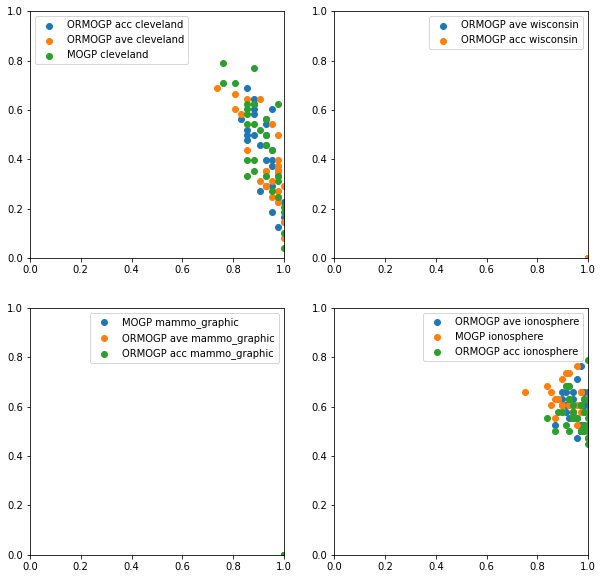

In [316]:
from matplotlib.transforms import Bbox

fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]

latex_table = [[],[],[],[]]

for j,fn in enumerate(fns_all):
    i = dataset_index(fn)
    
    ax = axs[ind[i][0], ind[i][1]]
    name = name_task[fn]
    dmaj = get_data(fn=fn, member_generation=True, training=False, final='majority_acc')
    dmin = get_data(fn=fn, member_generation=True, training=False, final='minority_acc')
    line = ax.scatter(dmaj, dmin, label=name)
    latex_table[i].append(np.mean(dmaj))
    ax.legend()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

graph_name = "tprtnr_selection_test"
for i in range(4):
    ax = axs[ind[i][0], ind[i][1]]
    extent = full_extent(ax).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'data/graphs/{graph_name}_{datasets[i]}.png', bbox_inches=extent)
    
# and pritning latex table 
df = pd.DataFrame(latex_table)
df[df == None] = -1
print(df.to_latex(index=False, float_format="%.2f", na_rep='-1'))

### Traing graph

In [304]:
# average runs

# How long were run times?

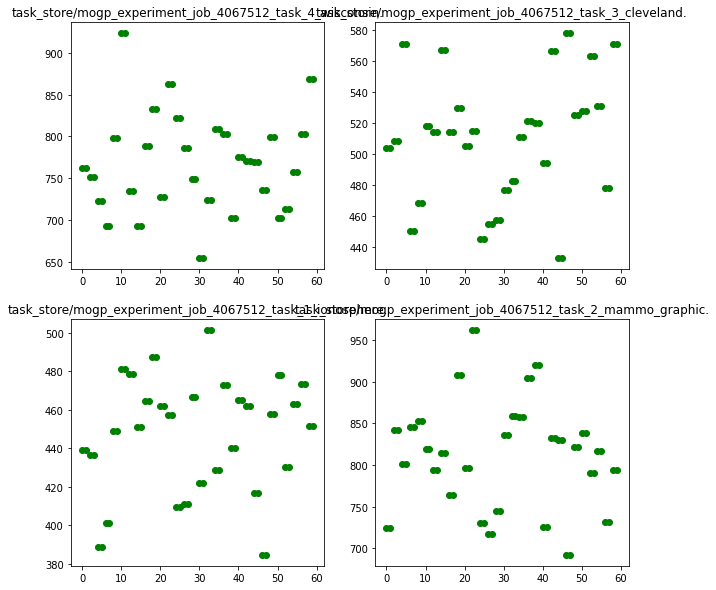

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    ax.scatter(np.arange(len(df)), df['time'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))

# Code Architechture 

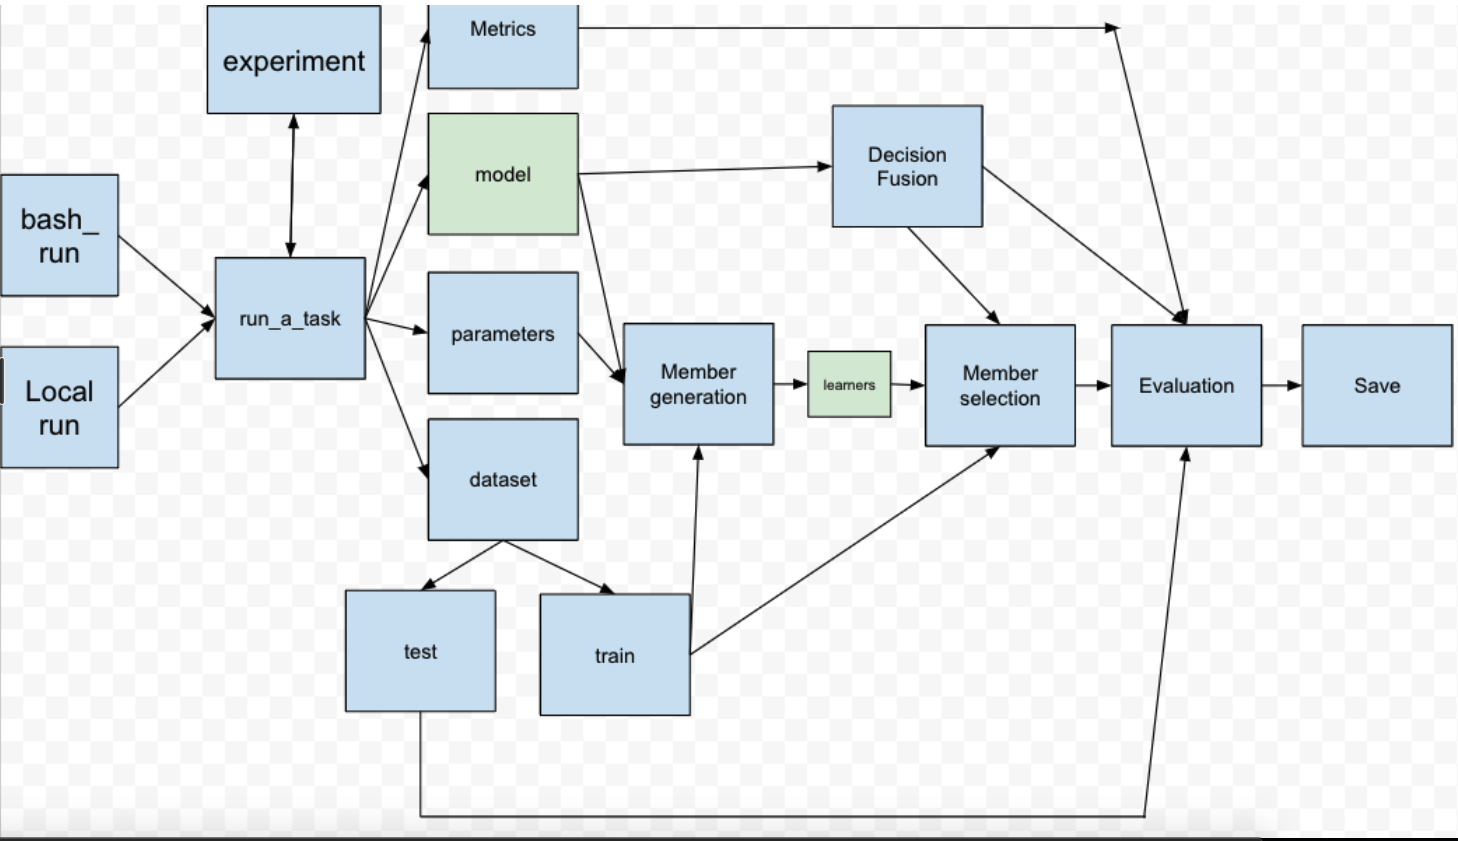

# Questions for the meeting.
- Based on this GP experiment, what ammendments need to be made? What visualisations should we aim for, learning curves, etc. 
    - More datasets?
- Things we try.
    - NEw objective function + full acc
    - New objective function + acc PER CLASS
  
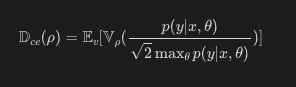

# MOGP results. Like to look at the results and version history

In [20]:
def df_avg_to_np(df):
    r = []
    for x in df['avg']:
        f1 = float(''.join(x.split()[0].replace('[','').split()))
        f2 = float(''.join(x.split()[1].replace(']','').split()))
        r.append([f1,f2])
    return np.array(r)
        

In [21]:
glb = glob.glob('task_store/*history*')
glb[0]

'task_store/history_24_mogp_experiment_job_4067512_task_2_mammo_graphic.csv'

In [22]:
n_tasks = 4
for i in range(1,n_tasks+1,1): # for each task
    glb = glob.glob(f'task_store/history_*_OR*task_{i}_*')  # collect all histories
    print(glb)
    avgs = np.zeros((51,2))
    for gl in glb: # go through each history
        df = pd.read_csv(gl)
        avgs += df_avg_to_np(df)
    
    # average over generations 
    avgs = avgs / len(glb)

    # graph generations 
    fig, axs = plt.subplots(1, 2, figsize=(10,10))
    axs[0].plot(np.arange(avgs.shape[0]), avgs[:,0], color='green')
    axs[1].plot(np.arange(avgs.shape[0]), avgs[:,1], color='green')



['task_store/history_24_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_22_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_26_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_28_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_20_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_25_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_23_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_27_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_29_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_21_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_4_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_2_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_6_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', '

ValueError: could not convert string to float: ''

In [ ]:
x = np.array([1,2,3])
q = np.array([1,2,3])
z = 1
print((z - x) /2)

print(x - q)

In [23]:
import random
random.seed(1)

In [24]:
import numpy as np
x = np.var(np.mean(np.random.rand(10)))
x

0.0

In [8]:
import numpy as np
x = np.mean(np.var(np.random.rand(10)))
x

0.066991262977315

In [27]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.ones((6,10))
print(a.shape)
print(b.shape)
print(b - a)
print(a - b)

(10,)
(6, 10)
[[ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]


In [33]:
x = np.ones((245))
y = np.ones((245,500)).T
y - x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [36]:
np.repeat(x)

TypeError: _repeat_dispatcher() missing 1 required positional argument: 'repeats'

In [46]:
c = np.array([[1,0],[2,0],[3,0],[4,0,],[5,0]])

q = np.tile(c,(4,1,1))

print(c.shape)
print(q.shape)


(5, 2)
(4, 5, 2)


In [53]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    print(f'a:{a}')
    return (a[0] + a[-1]) * 0.5

b = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(b.shape)
print(b)
b1=np.apply_along_axis(my_func, 0, b)
print(b1)
b2=np.apply_along_axis(my_func, 1, b)
print(b2)

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
a:[1 4 7]
a:[2 5 8]
a:[3 6 9]
[4. 5. 6.]
a:[1 2 3]
a:[4 5 6]
a:[7 8 9]
[2. 5. 8.]


In [57]:
x = np.array([1,2,3])
y = np.array([[1,2,3],[4,5,6]])
x-y

array([[ 0,  0,  0],
       [-3, -3, -3]])

In [60]:
x = np.random.rand(5,5)
y = np.random.rand(5,5)
(x - y).shape

(5, 5)

In [90]:
x = np.ones((3,5)).reshape(5,3,1)
y = np.ones((3,5)) * 2
z = (x - y)
(x - y).shape

(5, 3, 5)

In [85]:
x

array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

In [86]:
y

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [87]:
z

array([[[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]]])

In [79]:
y - x

ValueError: operands could not be broadcast together with shapes (3,6) (3,5) 

In [89]:
q = np.ones((5,5))
q[q == q] = 0 
q

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [101]:
y = np.array([1,2,3])
np.tile(y, (10,1)).shape

(10, 3)

In [146]:
x = '''0.23511883 0.2352044  0.23510644 0.23500028 0.23518839 0.23501418
 0.23507971 0.23528497 0.23525849 0.2350471  0.23514522 0.23521219
 0.23529953 0.23516423 0.23522173 0.23523831 0.23526576 0.23511871
 0.23505793 0.23524689 0.23524719 0.23504027 0.23510876 0.23528571
 0.23517205 0.23518528 0.23525601 0.23512245 0.23521391 0.23494271
 0.23502981 0.23528298 0.2351864  0.23520584 0.23520497 0.23509899
 0.23527339 0.2350765  0.23526947 0.23506593 0.23516113 0.23510562
 0.23520002 0.2351618  0.23500755 0.23520976 0.23506393 0.23529953
 0.23511147 0.23512252 0.23506595 0.23500168 0.23522602 0.2350654
 0.23525769 0.23522139 0.23498659 0.23500345 0.2352816  0.23517101
 0.23519014 0.23521712 0.23528378 0.23526136 0.23525702 0.23507971
 0.23524482 0.23512025 0.23525867 0.2352332  0.23516423 0.23526097
 0.23527268 0.23527138 0.23522925 0.23512992 0.23529953 0.23525601
 0.23514215 0.23522639 0.23501069 0.23522121 0.23519355 0.23526844
 0.23517471 0.23523212 0.23520811 0.23526349 0.23510413 0.23521708
 0.23511557 0.2352559  0.23509122 0.23517305 0.23520353 0.23519802
 0.23523554 0.23527658 0.23522538 0.23520082 0.23515366 0.23529107
 0.23521437 0.23518869 0.23524425 0.23511977 0.2352802  0.23503027
 0.23525796 0.23517952 0.23515806 0.2352736  0.23522201 0.23522451
 0.23519752 0.235177   0.23519598 0.23509438 0.23529059 0.23501888
 0.23523982 0.23502887 0.23518798 0.23520126 0.23527541 0.23516569
 0.235285   0.23503403 0.23518816 0.23510849 0.23519704 0.23517122
 0.23501782 0.23521275 0.23513568 0.23520738 0.23526862 0.23518174
 0.23494271 0.23529639 0.23521552 0.23520873 0.23529419 0.23514646
 0.23527658 0.23520782 0.23519546 0.23528412 0.23525801 0.23529953
 0.23518736 0.23528298 0.2352119  0.23528222 0.23525943 0.23520669
 0.23516556 0.23526115 0.23526947 0.23515262 0.23523453 0.23498586
 0.23526913 0.23518725 0.23510816 0.2349608  0.23498306 0.23527525
 0.23519429 0.23529772 0.23517574 0.23512871 0.23526668 0.23519562
 0.23509686 0.2351764  0.23507462 0.23517177 0.23518246 0.23525849
 0.23524411 0.23516058 0.23504639 0.23529059 0.23514529 0.23515173
 0.23522692 0.23505485 0.23495392 0.23518661 0.23515583 0.23527023
 0.23529139 0.23526275 0.23505932 0.23508104 0.23519906 0.23527688
 0.23508267 0.23519465 0.23518672 0.23506921 0.23526009 0.23527621
 0.23518929 0.23522653 0.23511399 0.23497219 0.23521985 0.23518353
 0.23529953 0.23522341 0.23500475 0.23496359 0.23518014 0.23524028
 0.23520768 0.23512311 0.23529522 0.2352     0.23527897 0.23527339
 0.23514857 0.23518007 0.23526099 0.23522925 0.23526463 0.23528974
 0.23506577 0.23506515 0.23529953 0.23517803 0.23506973 0.23522274
 0.23508086 0.2351274  0.23504999 0.23520192 0.23513474 0.23524689
 0.23509794 0.23520997 0.2352747  0.2351236  0.23527032 0.23528745
 0.23526    0.23518872 0.23529458 0.23527626 0.23529162 0.23524815
 0.23502255 0.23506861 0.23525074 0.23529953 0.23503151 0.23527658
 0.23518979 0.23518899 0.23520754 0.23522728 0.2351941  0.2352019
 0.23528192 0.23519156 0.23520986 0.23518512 0.23510112 0.23519688
 0.23494271 0.23520591 0.2352213  0.23511559 0.23522799 0.23519069
 0.23519504 0.23521043 0.23522909 0.23500838 0.23528997 0.23519291
 0.23529953 0.23528073 0.23519016 0.23509062 0.23514121 0.23519633
 0.23509601 0.23507909 0.2351941  0.23527539 0.23519415 0.23515611
 0.23521623 0.23529953 0.23509248 0.23529953 0.23523522 0.23510874
 0.23528727 0.23525306 0.23520632 0.23516629 0.23505527 0.23509899
 0.23521557 0.2352047  0.23508262 0.23526257 0.23520245 0.23518681
 0.2350585  0.23511507 0.23508494 0.2352667  0.23519431 0.23496277
 0.23524196 0.23511023 0.2352739  0.23521203 0.23498478 0.23520992
 0.23506295 0.23527532 0.23518803 0.23517328 0.23511174 0.23520389
 0.2351798  0.23519757 0.2352672  0.23509897 0.23519851 0.23519901
 0.23517643 0.23525601 0.235175   0.23509402 0.23522925 0.23529041
 0.23520415 0.23517154 0.23518571 0.23515134 0.2352071  0.23525941
 0.23529059 0.23509308 0.23516952 0.2352609  0.23527307 0.23526055
 0.23528289 0.23513676 0.23519997 0.23529495 0.23513912 0.23527718
 0.2352033  0.23506182 0.23511867 0.23520759 0.23529953 0.2351628
 0.23517347 0.23508718 0.23522079 0.23502628 0.23529953 0.2350765
 0.23515538 0.23512493 0.2351664  0.23512947 0.23517207 0.23527759
 0.23522343 0.2351415  0.2349851  0.2352071  0.23513215 0.23525964
 0.23529953 0.23517108 0.23518647 0.23512669 0.23528731 0.2352058
 0.23505151 0.23524363 0.23526395 0.2351105  0.23519202 0.23528545
 0.23510094 0.23519259 0.2352645  0.23507595 0.23510713 0.23520078
 0.23515519 0.23506425 0.23519871 0.23516276 0.23498031 0.2352016
 0.23528245 0.2352016  0.23518697 0.23527188 0.23508106 0.23514157
 0.23519667 0.2351186  0.23517929 0.23517418 0.23515503 0.23522598
 0.23522907 0.23525271 0.23512479 0.2352238  0.23520522 0.23529953
 0.23520761 0.23529953 0.23520332 0.23526239 0.23514288 0.23500643
 0.23507519 0.23518119 0.23506208 0.23512655 0.23506515 0.23528094
 0.23515767 0.23522389 0.23523882 0.23520882 0.23529772 0.23510505
 0.23513699 0.23519511 0.23516877 0.23509335 0.23521086 0.23520424
 0.23501305 0.23528298 0.23517317 0.23520752 0.23527993 0.23522029
 0.23527807 0.23519633 0.23500934 0.23521859 0.23513284 0.23518422
 0.23521463 0.23525601 0.23499932 0.23507709 0.23528779 0.23529316
 0.23514724 0.2352899  0.23511965 0.23520855 0.23526968 0.23524398
 0.23522632 0.23529953 0.23527101 0.23529953 0.23527429 0.23510408
 0.23527385 0.23527525 0.23527394 0.23519633 0.23505327 0.23529256
 0.23523072 0.23523687 0.23511784 0.23526525 0.2352362  0.23503486
 0.2352215  0.23509223 0.23520025 0.23521027 0.23517042 0.235069
 0.23525601 0.23497274'''

In [147]:
q = np.array([float(z) for z in x.split()])
q
print(np.mean(q))

0.23518263872


In [110]:
print(0.23518263878183732 - q)

[ 6.38087818e-05 -2.17612182e-05  7.61987818e-05  1.82358782e-04
 -5.75121816e-06  1.68458782e-04  1.02928782e-04 -1.02331218e-04
 -7.58512182e-05  1.35538782e-04  3.74187818e-05 -2.95512182e-05
 -1.16891218e-04  1.84087818e-05 -3.90912182e-05 -5.56712182e-05
 -8.31212182e-05  6.39287818e-05  1.24708782e-04 -6.42512182e-05
 -6.45512182e-05  1.42368782e-04  7.38787818e-05 -1.03071218e-04
  1.05887818e-05 -2.64121816e-06 -7.33712182e-05  6.01887818e-05
 -3.12712182e-05  2.39928782e-04  1.52828782e-04 -1.00341218e-04
 -3.76121816e-06 -2.32012182e-05 -2.23312182e-05  8.36487818e-05
 -9.07512182e-05  1.06138782e-04 -8.68312182e-05  1.16708782e-04
  2.15087818e-05  7.70187818e-05 -1.73812182e-05  2.08387818e-05
  1.75088782e-04 -2.71212182e-05  1.18708782e-04 -1.16891218e-04
  7.11687818e-05  6.01187818e-05  1.16688782e-04  1.80958782e-04
 -4.33812182e-05  1.17238782e-04 -7.50512182e-05 -3.87512182e-05
  1.96048782e-04  1.79188782e-04 -9.89612182e-05  1.16287818e-05
 -7.50121816e-06 -3.44812

In [217]:
N=2
np.random.seed(5)
M=3
x = np.arange(M*N).reshape(N,M)
y = (np.random.rand(M*N)).reshape(M,N,1)
#print((x- y))
print()
print(x.reshape(M,N,1) - y.reshape(N,M))

"""
0: which model
1 : on the Nth prediction 
2 : which omission
"""

g= x.reshape(M,N,1) - y.reshape(N,M)

print(g[0][0])

print(np.sum(g, axis=0))


[[[-0.22199317 -0.87073231 -0.20671916]
  [ 0.08138909  0.51158881  0.38825614]]

 [[ 1.77800683  1.12926769  1.79328084]
  [ 2.08138909  2.51158881  2.38825614]]

 [[ 3.77800683  3.12926769  3.79328084]
  [ 4.08138909  4.51158881  4.38825614]]]
[-0.22199317 -0.87073231 -0.20671916]
[[5.33402049 3.38780308 5.37984253]
 [6.24416728 7.53476643 7.16476841]]


In [214]:
x.reshape(M,N,1)

array([[[0],
        [1]],

       [[2],
        [3]],

       [[4],
        [5]]])

In [215]:
y.reshape(N,M)

array([[0.22199317, 0.87073231, 0.20671916],
       [0.91861091, 0.48841119, 0.61174386]])

In [174]:
f = x - y
print(np.mean(f, axis=0))
print(np.mean(f, axis=2))
print(f.shape)

[[-8. -7. -6.]
 [-4. -3. -2.]]
[[-9. -5.]
 [-7. -3.]
 [-5. -1.]]
(3, 2, 3)


In [198]:
(x-y)[2,:,:].shape

(2, 3)

In [200]:
N=2
np.random.seed(2)
M=3
x = np.arange(M*N).reshape(N,M)
y = (np.random.rand(M*N)).reshape(M,N,1)
print(np.sum(x- y))
print()
print(np.sum(x.reshape(M,N,1) - y.reshape(N,M)))


38.40717411732527

38.40717411732527


In [201]:
np.square(y)

array([[[0.19009155],
        [0.00067217]],

       [[0.30212884],
        [0.18950559]],

       [[0.17670909],
        [0.10912109]]])

In [202]:
ff = np.array([1,2,3])
gg = np.array([4,8,10])


In [203]:
ff - gg

array([-3, -6, -7])

In [205]:
ff - gg.reshape(3,1)

array([[-3, -2, -1],
       [-7, -6, -5],
       [-9, -8, -7]])

In [209]:
(ff.reshape(3,1) - gg).T

array([[-3, -2, -1],
       [-7, -6, -5],
       [-9, -8, -7]])

In [224]:
mns = np.array([3,8,6])
print(mns.shape)

pred = np.random.rand(15).reshape(5,3)



(3,)


In [226]:
pred

array([[0.00164217, 0.51547261, 0.63979518],
       [0.9856244 , 0.2590976 , 0.80249689],
       [0.87048309, 0.92274961, 0.00221421],
       [0.46948837, 0.98146874, 0.3989448 ],
       [0.81373248, 0.5464565 , 0.77085409]])

In [227]:
mns - pred

array([[2.99835783, 7.48452739, 5.36020482],
       [2.0143756 , 7.7409024 , 5.19750311],
       [2.12951691, 7.07725039, 5.99778579],
       [2.53051163, 7.01853126, 5.6010552 ],
       [2.18626752, 7.4535435 , 5.22914591]])